In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

headers = {"User-Agent": "Mozilla/5.0"}
all_data = []

for page_num in range(1, 21):
    url = f"https://www.screener.in/company/CNX500/?page={page_num}"
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, "html.parser")
    rows = soup.select("tr[data-row-company-id]")

    for row in rows:
        cols = row.find_all("td")
        name = cols[1].text.strip()
        cmp = cols[2].text.strip()
        pe = cols[3].text.strip()
        mcap = cols[4].text.strip()
        dy = cols[5].text.strip()
        profit = cols[6].text.strip()
        profit_var = cols[7].text.strip()
        sales = cols[8].text.strip()
        sales_var = cols[9].text.strip()
        roce = cols[10].text.strip()

        all_data.append([name, cmp, pe, mcap, dy, profit, profit_var, sales, sales_var, roce])
    
    time.sleep(1)


columns = [
    "Company", "CMP", "P/E", "Market Cap (Cr)", "Div Yield (%)",
    "Net Profit (Cr)", "Profit Var (%)", "Sales (Cr)", "Sales Var (%)", "ROCE (%)"
]

df = pd.DataFrame(all_data, columns=columns)
df.to_csv("nifty-500.csv", index = False)
print(df.head())

            Company      CMP    P/E Market Cap (Cr) Div Yield (%)  \
0  Reliance Industr  1391.00  25.03      1882366.37          0.40   
1         HDFC Bank  1983.50  21.59      1521965.38          0.56   
2     Bharti Airtel  1930.15  39.29      1158177.49          0.83   
3               TCS  3038.00  22.33      1099174.91          1.96   
4        ICICI Bank  1447.15  19.45      1033028.73          0.77   

  Net Profit (Cr) Profit Var (%) Sales (Cr) Sales Var (%) ROCE (%)  
0        30783.00          35.62  243632.00          5.11     9.43  
1        17090.43          -1.32   87371.87          7.14     7.51  
2         7421.80          62.85   49462.60         28.45    13.48  
3        12819.00           5.98   63437.00          1.32    64.63  
4        14456.33          15.92   49079.96         10.09     7.88  


In [1]:
import pandas as pd
stock_analysis = pd.read_csv("nifty-500.csv")
stock_analysis

,Company,CMP,P/E,Market Cap (Cr),Div Yield (%),Net Profit (Cr),Profit Var (%),Sales (Cr),Sales Var (%),ROCE (%)
0,Reliance Industr,1391.00,25.03,1882366.37,0.40,30783.00,35.62,243632.00,5.11,9.43
1,HDFC Bank,1983.50,21.59,1521965.38,0.56,17090.43,-1.32,87371.87,7.14,7.51
2,Bharti Airtel,1930.15,39.29,1158177.49,0.83,7421.80,62.85,49462.60,28.45,13.48
3,TCS,3038.00,22.33,1099174.91,1.96,12819.00,5.98,63437.00,1.32,64.63
4,ICICI Bank,1447.15,19.45,1033028.73,0.77,14456.33,15.92,49079.96,10.09,7.88
...,...,...,...,...,...,...,...,...,...,...
495,Sh.Renuka Sugar,29.56,NaN,6291.78,0.00,93.10,182.52,2691.30,-20.28,10.46
496,Sterling & Wils.,266.00,57.01,6210.96,0.00,38.69,663.01,1761.63,92.52,16.97
497,KNR Construct.,208.75,5.28,5870.79,0.12,7.60,-76.14,975.21,-31.03,29.18
498,Route Mobile,875.85,18.06,5517.66,1.02,58.78,-32.23,1050.83,-4.77,17.71


In [2]:
stock_analysis.isnull().sum()

Company             0
CMP                 0
P/E                24
Market Cap (Cr)     0
Div Yield (%)       0
Net Profit (Cr)     0
Profit Var (%)      0
Sales (Cr)          0
Sales Var (%)       0
ROCE (%)            0
dtype: int64

In [3]:
stock_analysis[stock_analysis["P/E"].isnull()]

,Company,CMP,P/E,Market Cap (Cr),Div Yield (%),Net Profit (Cr),Profit Var (%),Sales (Cr),Sales Var (%),ROCE (%)
98,Swiggy,391.70,NaN,97676.22,0.00,-1197.00,-100.17,4961.00,53.97,-29.22
100,GMR Airports,91.90,NaN,97037.03,0.00,-137.11,6.71,3205.23,33.43,6.89
132,Vodafone Idea,6.82,NaN,73889.97,0.00,-7166.10,6.63,11013.50,3.83,-1.93
142,One 97,1060.70,NaN,67703.38,0.00,122.50,116.52,1917.50,27.70,-10.14
237,Poonawalla Fin,440.00,NaN,34281.33,0.46,62.60,-78.54,1313.97,34.41,4.77
259,ITI,301.45,NaN,28965.92,0.00,-4.84,71.85,1045.70,73.91,-1.33
290,Wockhardt,1480.50,NaN,24055.94,0.00,-45.00,80.39,743.00,6.14,3.75
308,M R P L,124.90,NaN,21889.98,2.39,-270.66,-469.65,17356.23,-25.34,4.38
318,A B Real Estate,1890.15,NaN,21112.14,0.10,-27.08,-1096.10,145.56,-58.80,-0.16
328,Reliance Power,47.58,NaN,19677.94,0.00,44.68,145.46,1885.58,-5.35,6.15


In [4]:
stock_analysis.loc[98, "P/E"] = -5.26
stock_analysis.loc[100, "P/E"] = -207
stock_analysis.loc[132, "P/E"] = -1.7
stock_analysis.loc[142, "P/E"] = 226
stock_analysis.loc[237, "P/E"] = -102
stock_analysis.loc[259, "P/E"] = -120.5
stock_analysis.loc[290, "P/E"] = -546
stock_analysis.loc[308, "P/E"] = -77
stock_analysis.loc[318, "P/E"] = -111
stock_analysis.loc[328, "P/E"] = -2050
stock_analysis.loc[329, "P/E"] = 6.18
stock_analysis.loc[343, "P/E"] = -99
stock_analysis.loc[348, "P/E"] = -7.6
stock_analysis.loc[439, "P/E"] = -9
stock_analysis.loc[444, "P/E"] = -33.5
stock_analysis.loc[453, "P/E"] = 9.2
stock_analysis.loc[459, "P/E"] = -5.8
stock_analysis.loc[463, "P/E"] = -35.7
stock_analysis.loc[468, "P/E"] = -77
stock_analysis.loc[472, "P/E"] = -52
stock_analysis.loc[473, "P/E"] = -12
stock_analysis.loc[474, "P/E"] = -24.6
stock_analysis.loc[479, "P/E"] = -6.2
stock_analysis.loc[495, "P/E"] = -21

In [5]:
stock_analysis.drop(["CMP", "Div Yield (%)"], axis = 1, inplace = True)

In [6]:
stock_analysis.isnull().sum()

Company            0
P/E                0
Market Cap (Cr)    0
Net Profit (Cr)    0
Profit Var (%)     0
Sales (Cr)         0
Sales Var (%)      0
ROCE (%)           0
dtype: int64

In [7]:
stock_analysis

,Company,P/E,Market Cap (Cr),Net Profit (Cr),Profit Var (%),Sales (Cr),Sales Var (%),ROCE (%)
0,Reliance Industr,25.03,1882366.37,30783.00,35.62,243632.00,5.11,9.43
1,HDFC Bank,21.59,1521965.38,17090.43,-1.32,87371.87,7.14,7.51
2,Bharti Airtel,39.29,1158177.49,7421.80,62.85,49462.60,28.45,13.48
3,TCS,22.33,1099174.91,12819.00,5.98,63437.00,1.32,64.63
4,ICICI Bank,19.45,1033028.73,14456.33,15.92,49079.96,10.09,7.88
...,...,...,...,...,...,...,...,...
495,Sh.Renuka Sugar,-21.00,6291.78,93.10,182.52,2691.30,-20.28,10.46
496,Sterling & Wils.,57.01,6210.96,38.69,663.01,1761.63,92.52,16.97
497,KNR Construct.,5.28,5870.79,7.60,-76.14,975.21,-31.03,29.18
498,Route Mobile,18.06,5517.66,58.78,-32.23,1050.83,-4.77,17.71


### Separating Stocks based on Market cap

In [8]:
large_cap = stock_analysis[stock_analysis["Market Cap (Cr)"] >= 50000]

In [9]:
large_cap.shape

(190, 8)

In [10]:
mid_cap = stock_analysis[(stock_analysis["Market Cap (Cr)"] > 17000 ) & (stock_analysis["Market Cap (Cr)"] <= 50000)]

In [11]:
mid_cap.shape

(168, 8)

In [12]:
small_cap = stock_analysis[stock_analysis["Market Cap (Cr)"] <= 17000]

In [13]:
small_cap.shape

(142, 8)

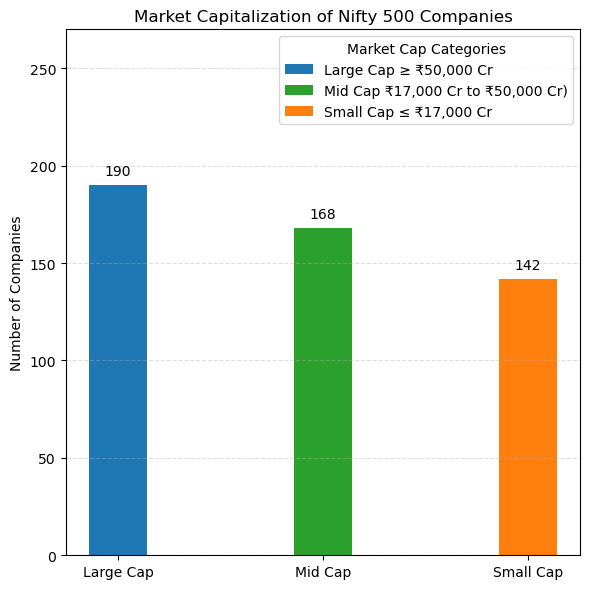

In [80]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Data
categories = ["Large Cap", "Mid Cap", "Small Cap"]
counts = [190, 168, 142]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

# Plot
plt.figure(figsize=(6, 6))
bars = plt.bar(categories, counts, color=colors, width=0.28)

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, yval, ha='center', fontsize=10)

# Custom legend
legend_elements = [
    Patch(facecolor='#1f77b4', label='Large Cap ≥ ₹50,000 Cr'),
    Patch(facecolor='#2ca02c', label='Mid Cap ₹17,000 Cr to ₹50,000 Cr)'),
    Patch(facecolor='#ff7f0e', label='Small Cap ≤ ₹17,000 Cr')
]
plt.legend(handles=legend_elements, title="Market Cap Categories", loc='upper right')

# Formatting
plt.ylabel("Number of Companies")
plt.title("Market Capitalization of Nifty 500 Companies")
plt.ylim(0, max(counts) + 80)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()


### Relationship between Market Cap and Net Profit

In [36]:
large_cap = stock_analysis[stock_analysis["Market Cap (Cr)"] >= 50000]
large_cap["Net Profit (Cr)"].median()

692.5450000000001

In [38]:
mid_cap = stock_analysis[(stock_analysis["Market Cap (Cr)"] > 17000 ) & (stock_analysis["Market Cap (Cr)"] <= 50000)]
mid_cap["Net Profit (Cr)"].median()

182.33499999999998

In [42]:
small_cap = stock_analysis[stock_analysis["Market Cap (Cr)"] <= 17000]
small_cap["Net Profit (Cr)"].median()

90.995

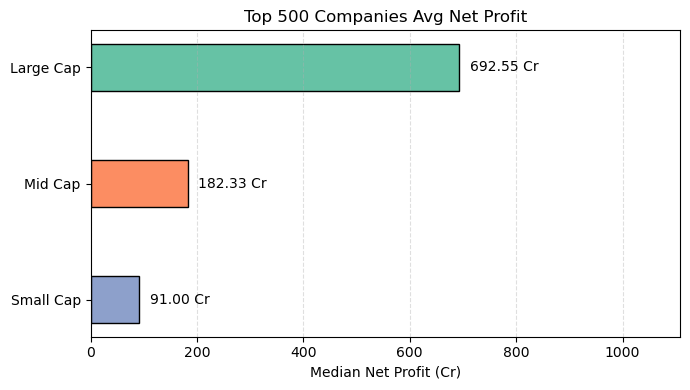

In [67]:
import matplotlib.pyplot as plt

# Data (Large Cap at top)
categories = ['Large Cap', 'Mid Cap', 'Small Cap']
median_profits = [692.55, 182.33, 90.995]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Choose any colors

# Reverse the data to make Large Cap appear at the top in horizontal bar
categories = categories[::-1]
median_profits = median_profits[::-1]
colors = colors[::-1]

# Create plot
plt.figure(figsize=(7, 4))
bars = plt.barh(categories, median_profits, color=colors, edgecolor='black', height=0.4)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2.0, f'{width:.2f} Cr', va='center', fontsize=10)

# Title and axis labels
plt.xlabel('Median Net Profit (Cr)', fontsize=10)
plt.title('Top 500 Companies Avg Net Profit', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlim(0, max(median_profits) * 1.6)

plt.tight_layout()
plt.show()


### PE Ratio

In [41]:
under_valued = stock_analysis[(stock_analysis["P/E"] <= 20) & (stock_analysis["P/E"] >= 0)]
under_valued.shape

(98, 10)

In [42]:
fair_values = stock_analysis[(stock_analysis["P/E"] >= 20) & (stock_analysis["P/E"] <= 26)]
fair_values.shape

(41, 10)

In [43]:
over_valued = stock_analysis[stock_analysis["P/E"] >= 26]
over_valued.shape

(340, 10)

In [44]:
negative_pe = stock_analysis[stock_analysis["P/E"] <= 0]
negative_pe.shape

(21, 10)

### Price to Earnings

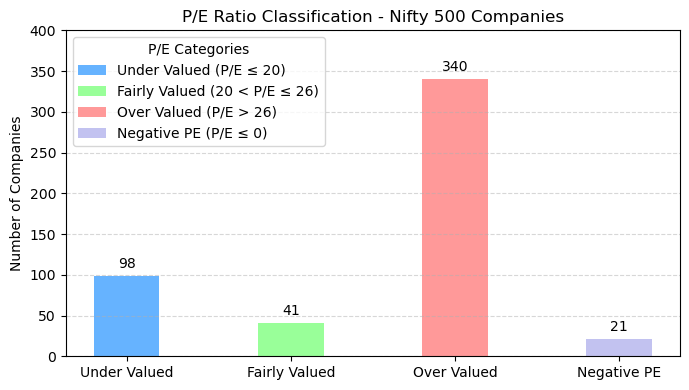

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Data
categories = ["Under Valued", "Fairly Valued", "Over Valued", "Negative PE"]
counts = [98, 41, 340, 21]
colors = ['#66b3ff', '#99ff99', '#ff9999', '#c2c2f0']

# Plot
plt.figure(figsize=(7, 4))
bars = plt.bar(categories, counts, color=colors, width=0.4)  # reduced width

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 10, yval, ha='center', fontsize=10)

# Custom legend
legend_elements = [
    Patch(facecolor='#66b3ff', label='Under Valued (P/E ≤ 20)'),
    Patch(facecolor='#99ff99', label='Fairly Valued (20 < P/E ≤ 26)'),
    Patch(facecolor='#ff9999', label='Over Valued (P/E > 26)'),
    Patch(facecolor='#c2c2f0', label='Negative PE (P/E ≤ 0)')
]
plt.legend(handles=legend_elements, title="P/E Categories", loc='upper left')

# Formatting
plt.ylabel("Number of Companies")
plt.title("P/E Ratio Classification - Nifty 500 Companies")
plt.ylim(0, max(counts) + 60)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


### Profit Variance

In [31]:
positive_var = stock_analysis[stock_analysis["Profit Var (%)"] <= 0]

,Company,CMP,P/E,Market Cap (Cr),Div Yield (%),Net Profit (Cr),Profit Var (%),Sales (Cr),Sales Var (%),ROCE (%),PE Category
1,HDFC Bank,1983.50,21.59,1521965.38,0.56,17090.43,-1.32,87371.87,7.14,7.51,Fairly Valued
5,SBI,805.70,9.58,743710.83,1.99,20379.46,-8.34,126997.00,8.11,6.47,Under Valued
13,Kotak Mah. Bank,2001.80,20.72,398035.90,0.12,4472.18,-2.35,17248.31,8.91,8.17,Fairly Valued
14,HCL Technologies,1464.05,23.42,397294.13,3.67,3844.00,-9.73,30349.00,8.17,31.61,Fairly Valued
18,Axis Bank,1074.60,12.02,333331.79,0.09,6279.49,-2.99,32348.31,3.82,7.11,Under Valued
...,...,...,...,...,...,...,...,...,...,...,...
492,RattanIndia Ent,52.99,90.73,7324.66,0.00,-358.51,-337.80,1504.56,16.25,12.70,Over Valued
494,Raymond Lifestyl,1123.85,106.14,6846.89,0.00,-44.95,-133.98,1494.15,-11.30,2.87,Over Valued
497,KNR Construct.,208.75,5.28,5870.79,0.12,7.60,-76.14,975.21,-31.03,29.18,Under Valued
498,Route Mobile,875.85,18.06,5517.66,1.02,58.78,-32.23,1050.83,-4.77,17.71,Under Valued


In [16]:
negative_var = stock_analysis[stock_analysis["Profit Var (%)"] >= 0]

,Company,CMP,P/E,Market Cap (Cr),Div Yield (%),Net Profit (Cr),Profit Var (%),Sales (Cr),Sales Var (%),ROCE (%)
0,Reliance Industr,1391.00,25.03,1882366.37,0.40,30783.00,35.62,243632.00,5.11,9.43
2,Bharti Airtel,1930.15,39.29,1158177.49,0.83,7421.80,62.85,49462.60,28.45,13.48
3,TCS,3038.00,22.33,1099174.91,1.96,12819.00,5.98,63437.00,1.32,64.63
4,ICICI Bank,1447.15,19.45,1033028.73,0.77,14456.33,15.92,49079.96,10.09,7.88
6,Infosys,1439.35,21.92,597945.21,2.94,6924.00,8.68,42279.00,7.54,37.50
...,...,...,...,...,...,...,...,...,...,...
489,Akums Drugs,488.75,23.78,7692.59,0.00,149.61,457.61,1055.55,11.79,16.20
490,Guj Pipavav Port,155.00,18.78,7493.32,4.72,109.04,8.52,251.77,0.20,24.88
493,Just Dial,829.90,11.75,7057.87,0.00,159.65,131.51,297.86,6.16,15.31
495,Sh.Renuka Sugar,29.56,-21.00,6291.78,0.00,93.10,182.52,2691.30,-20.28,10.46


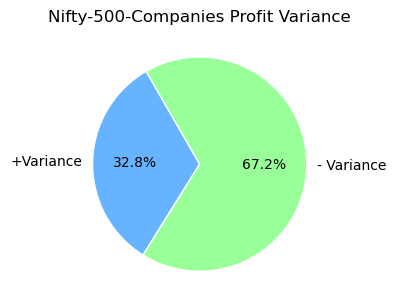

In [1]:
import matplotlib.pyplot as plt

# Categories and counts from your data
labels = ["+Variance", "- Variance"]
sizes = [164, 336]
colors = ['#66b3ff','#99ff99']

# Create pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=120, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title('Nifty-500-Companies Profit Variance')
plt.tight_layout()
plt.show()


### Sales Vs Profit

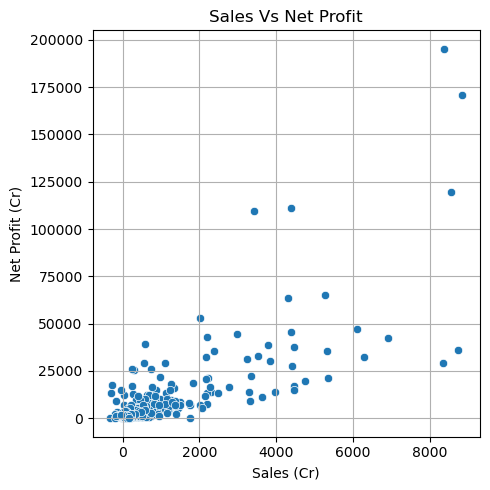

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("nifty-500.csv")

# Plot after filtering
plt.figure(figsize=(5,5))
sns.scatterplot(x='Net Profit (Cr)', y='Sales (Cr)', data=df_filtered)
plt.title('Sales Vs Net Profit')
plt.xlabel('Sales (Cr)')
plt.ylabel('Net Profit (Cr)')
plt.grid()
plt.tight_layout()
plt.show()


### Market Cap Vs Net Profit

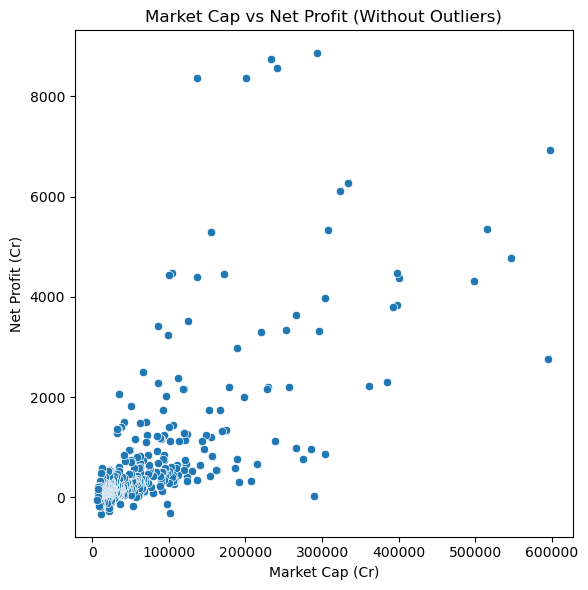

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("nifty-500.csv")
# Convert columns to numeric (if not already)
df['Market Cap (Cr)'] = pd.to_numeric(df['Market Cap (Cr)'], errors='coerce')
df['Net Profit (Cr)'] = pd.to_numeric(df['Net Profit (Cr)'], errors='coerce')

# Drop rows with NaN in required columns
df = df.dropna(subset=['Market Cap (Cr)', 'Net Profit (Cr)'])

# Filter out outliers using 1st and 99th percentiles
q_low_mcap = df['Market Cap (Cr)'].quantile(0.01)
q_high_mcap = df['Market Cap (Cr)'].quantile(0.99)
q_low_profit = df['Net Profit (Cr)'].quantile(0.01)
q_high_profit = df['Net Profit (Cr)'].quantile(0.99)

df_filtered = df[
    (df['Market Cap (Cr)'] >= q_low_mcap) & (df['Market Cap (Cr)'] <= q_high_mcap) &
    (df['Net Profit (Cr)'] >= q_low_profit) & (df['Net Profit (Cr)'] <= q_high_profit)
]

# Plot after filtering
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Market Cap (Cr)', y='Net Profit (Cr)', data=df_filtered)
plt.title('Market Cap vs Net Profit (Without Outliers)')
plt.xlabel('Market Cap (Cr)')
plt.ylabel('Net Profit (Cr)')
plt.tight_layout()
plt.show()


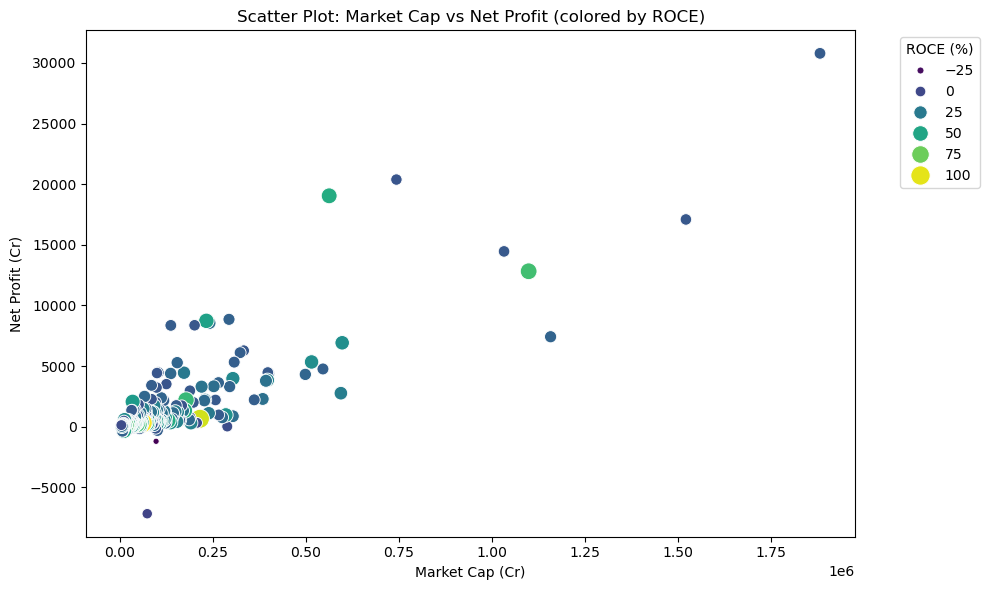

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Market Cap (Cr)', y='Net Profit (Cr)', hue='ROCE (%)', palette='viridis', size='ROCE (%)', sizes=(20, 200))
plt.title('Scatter Plot: Market Cap vs Net Profit (colored by ROCE)')
plt.xlabel('Market Cap (Cr)')
plt.ylabel('Net Profit (Cr)')
plt.legend(title='ROCE (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


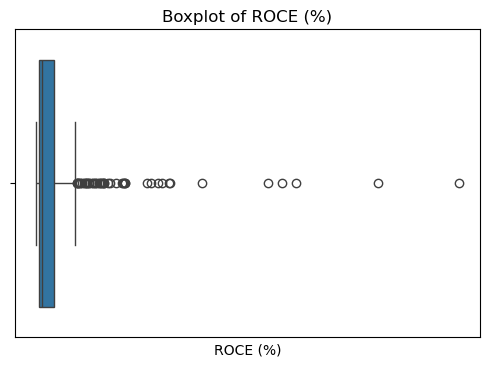

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x=stock_analysis['Market Cap (Cr)'])
plt.title('Boxplot of ROCE (%)')
plt.xticks([])  # Hides the x-axis tick labels
plt.xlabel('ROCE (%)')
plt.show()


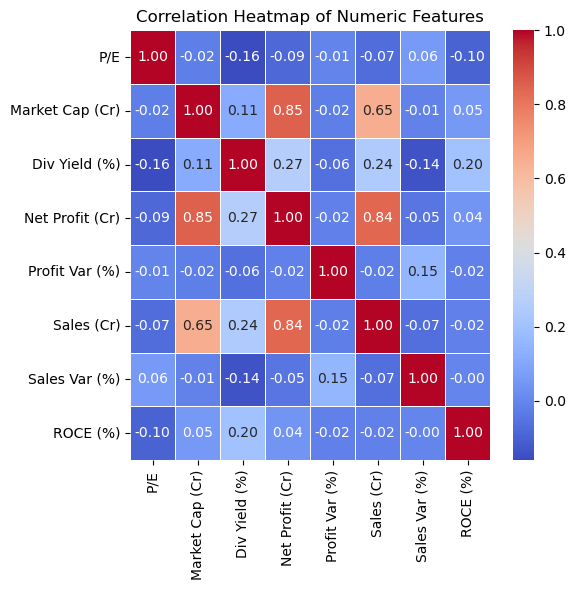

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
num_cols = ['P/E', 'Market Cap (Cr)', 'Div Yield (%)', 'Net Profit (Cr)',
            'Profit Var (%)', 'Sales (Cr)', 'Sales Var (%)', 'ROCE (%)']

# Compute correlation matrix
corr_matrix = stock_analysis[num_cols].corr()
\
# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


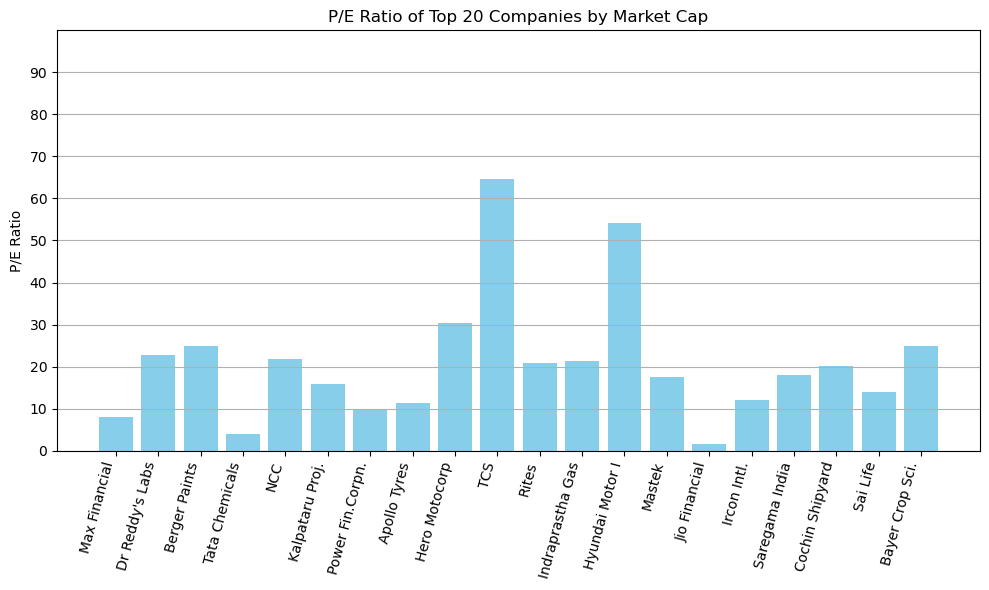

In [10]:
import matplotlib.pyplot as plt

# If you have a large number of companies, plot only the top N by Market Cap or P/E
# Example: Top 20 by Market Cap
top_n = 20
df_top = stock_analysis.sort_values(by="Market Cap (Cr)", ascending=False).sample(top_n)

plt.figure(figsize=(10, 6))
plt.bar(df_top['Company'], df_top['ROCE (%)'], color='skyblue')
plt.xticks(rotation=75, ha='right')
plt.ylabel('P/E Ratio')
plt.ylim(0, 100)
plt.yticks(range(0, 100, 10))
plt.grid(axis = "y")
plt.title('P/E Ratio of Top 20 Companies by Market Cap')
plt.tight_layout()
plt.show()


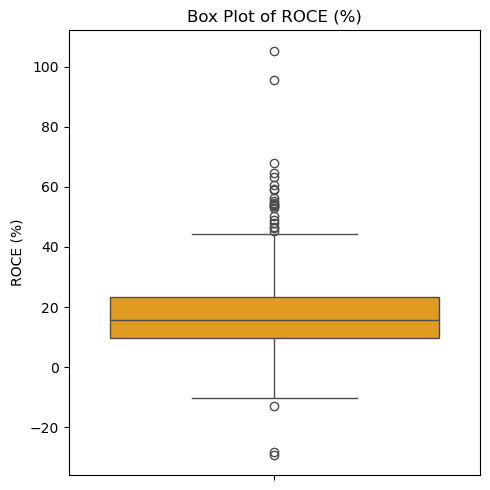

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.boxplot(y=stock_analysis["ROCE (%)"], color='orange')
plt.title('Box Plot of ROCE (%)')
plt.ylabel('ROCE (%)')
plt.tight_layout()
plt.show()


In [19]:
q1 = stock_analysis["ROCE (%)"].quantile(0.25)
q2 = stock_analysis["ROCE (%)"].quantile(0.50)
q3 = stock_analysis["ROCE (%)"].quantile(0.75)
minimum = stock_analysis["ROCE (%)"].min()
maximum = stock_analysis["ROCE (%)"].max()

print(f"Min: {minimum}")
print(f"25% (Q1): {q1}")
print(f"50% (Median): {q2}")
print(f"75% (Q3): {q3}")
print(f"Max: {maximum}")


Min: -29.22
25% (Q1): 9.612499999999999
50% (Median): 15.8
75% (Q3): 23.475
Max: 105.34
